<a href="https://colab.research.google.com/github/MadhuriKonnur/housepriceadv/blob/master/house_price_predict_multinominal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House  price   prediction **

Multivariate  or mutlinomial  regression using 
Linear  regression,
Randomforest
GradientBoostingRegressor




by Madhuri Konnur

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Data  dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

access data from google  drive , for  example  from  drive  go to sharable  links  of  ( .csv files ) .
Take  test  and  train  data  csv files  shareable  links.
paste  it  and  take  out  id's 

 train- https://drive.google.com/open?id=1Wuv6-MLsiJzZOmsRh8nSsWLdEs0wmVGX
 test-https://drive.google.com/open?id=1-kO6lBj8U3BYKysqcQTniJxDErg8BDZ7
 sample_submission1.csv-https://drive.google.com/open?id=1Bc9AUf3dfBWHKuFvgqKw34kJ-oOM4PGh

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Google drive  data access
train_downloaded=drive.CreateFile({'id':'1Wuv6-MLsiJzZOmsRh8nSsWLdEs0wmVGX'})
train_downloaded.GetContentFile('train.csv')
test_downloaded=drive.CreateFile({'id':'1-kO6lBj8U3BYKysqcQTniJxDErg8BDZ7'})
test_downloaded.GetContentFile('test.csv')


In [0]:
submissionL_downloaded=drive.CreateFile({'id':'1Bc9AUf3dfBWHKuFvgqKw34kJ-oOM4PGh'})
submissionL_downloaded.GetContentFile('sample_submission1.csv')

In [0]:
train_d=pd.read_csv('train.csv')
test_d=pd.read_csv('test.csv')

In [0]:
#train_d.tail(3)

In [0]:
#test_d.tail(3)

In [420]:
# check out the size of the data
print("Train data shape:", train_d.shape)
print("Test data shape:", test_d.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [421]:

raw = pd.concat([train_d, test_d])

raw.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(2919, 81)

In [422]:
raw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [423]:
#***
# numeric data
num_df = train.select_dtypes(exclude=['object']).copy()
num_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

**Handling the  missing  values**

In [424]:
#Let's check if the data set has any missing values. 
raw.columns[raw.isnull().any()]
#***
#num_df.columns[num_df.isnull().any()]

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')

In [425]:
#missing value counts in each of these columns
Isnull = raw.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          199.246575
MiscFeature     192.739726
Alley           186.369863
Fence           160.821918
SalePrice        99.931507
FireplaceQu      97.260274
LotFrontage      33.287671
GarageQual       10.890411
GarageCond       10.890411
GarageFinish     10.890411
GarageYrBlt      10.890411
GarageType       10.753425
BsmtExposure      5.616438
BsmtCond          5.616438
BsmtQual          5.547945
BsmtFinType2      5.479452
BsmtFinType1      5.410959
MasVnrType        1.643836
MasVnrArea        1.575342
MSZoning          0.273973
BsmtFullBath      0.136986
BsmtHalfBath      0.136986
Utilities         0.136986
Functional        0.136986
Electrical        0.068493
BsmtUnfSF         0.068493
Exterior1st       0.068493
Exterior2nd       0.068493
TotalBsmtSF       0.068493
GarageCars        0.068493
BsmtFinSF2        0.068493
BsmtFinSF1        0.068493
KitchenQual       0.068493
SaleType          0.068493
GarageArea        0.068493
dtype: float64

*Visualising missing values*

In [0]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [0]:
Isnull.columns = ['count']

In [0]:
Isnull.index.names = ['Name']

In [0]:
Isnull['Name'] = Isnull.index

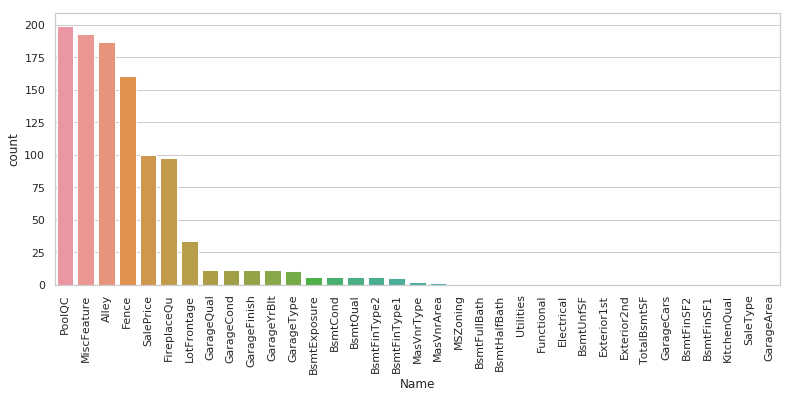

In [430]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

**Finding  the  Corralation between train attributes**

In [0]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
raw_corr = raw.select_dtypes(include=[np.number])

In [432]:
raw_corr.shape

(2919, 38)

In [0]:
#Delete Id because that is not need for corralation plot
del raw_corr['Id']

               1stFlrSF  2ndFlrSF  3SsnPorch  ...  YearBuilt  YearRemodAdd    YrSold
1stFlrSF       1.000000 -0.249823   0.044086  ...   0.310814      0.242245 -0.013442
2ndFlrSF      -0.249823  1.000000  -0.032458  ...   0.017588      0.158985 -0.019229
3SsnPorch      0.044086 -0.032458   1.000000  ...   0.015958      0.037433  0.022560
BedroomAbvGr   0.108418  0.503506  -0.048279  ...  -0.053101     -0.021912 -0.020453
BsmtFinSF1     0.458092 -0.162301   0.050908  ...   0.279581      0.152126  0.022556
BsmtFinSF2     0.084330 -0.097744  -0.023279  ...  -0.027595     -0.062153  0.008883
BsmtFullBath   0.261816 -0.161468   0.027378  ...   0.211580      0.134947  0.045255
BsmtHalfBath   0.011074 -0.060282   0.026861  ...  -0.030282     -0.046285 -0.020028
BsmtUnfSF      0.296600 -0.000376  -0.005810  ...   0.130473      0.165175 -0.038015
EnclosedPorch -0.065796  0.054645  -0.032822  ...  -0.374073     -0.220456 -0.001134
Fireplaces     0.407545  0.169991   0.018852  ...   0.170680     

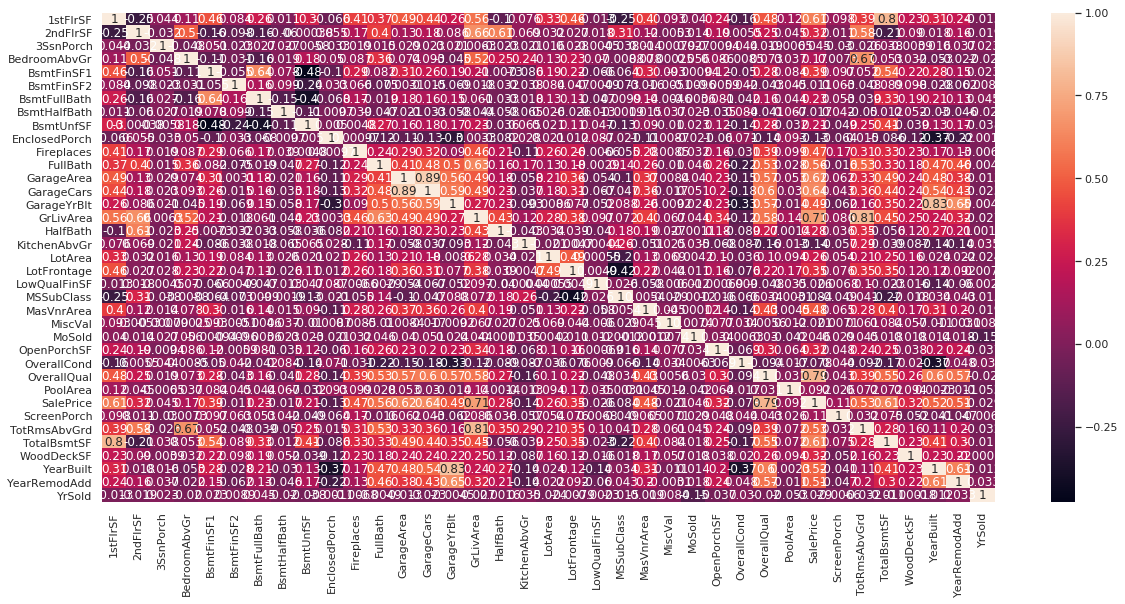

In [434]:
#Coralation plot
corr = raw_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

print(corr)


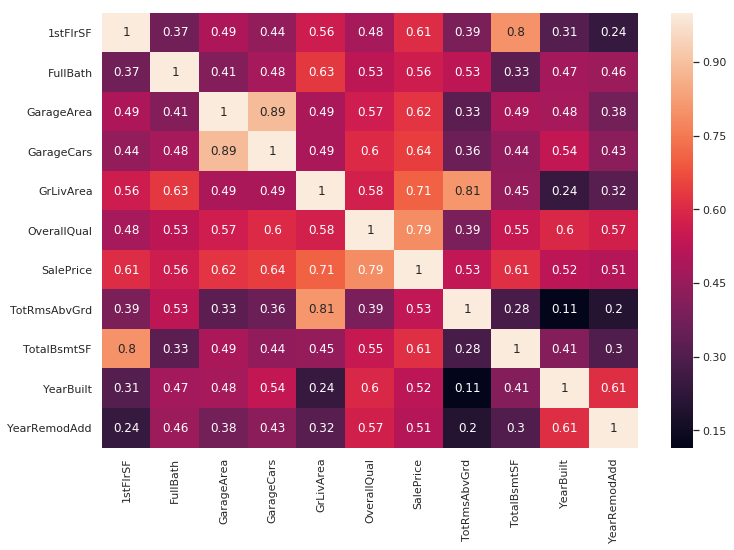

In [435]:
#to return a list of the unique values
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = raw[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [436]:
#Here OverallQual is highly correlated with target feature of salepric

#unique value of OverallQual
raw.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

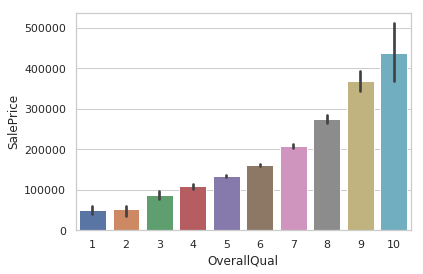

In [437]:
sns.barplot(raw.OverallQual, raw.SalePrice)

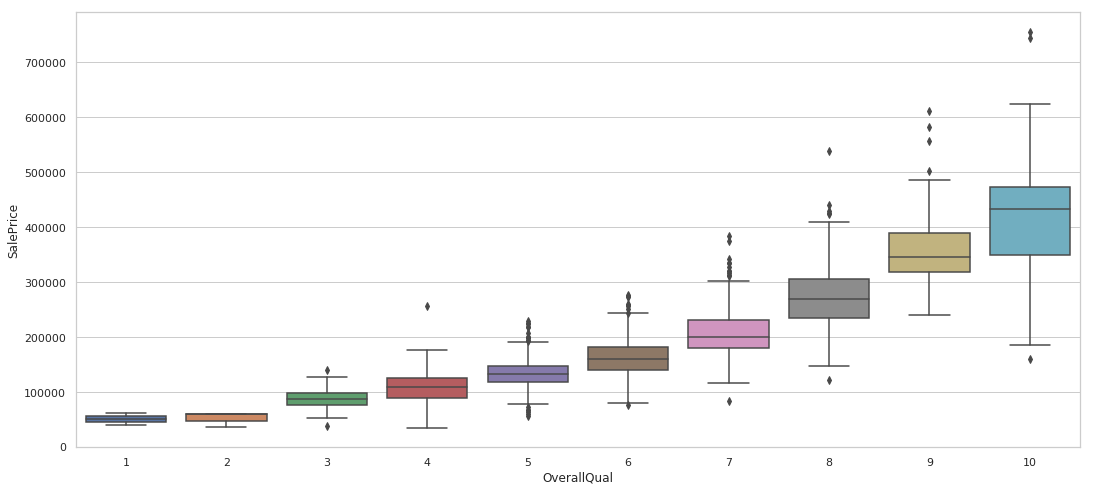

In [438]:

#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=raw.OverallQual, y=raw.SalePrice)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


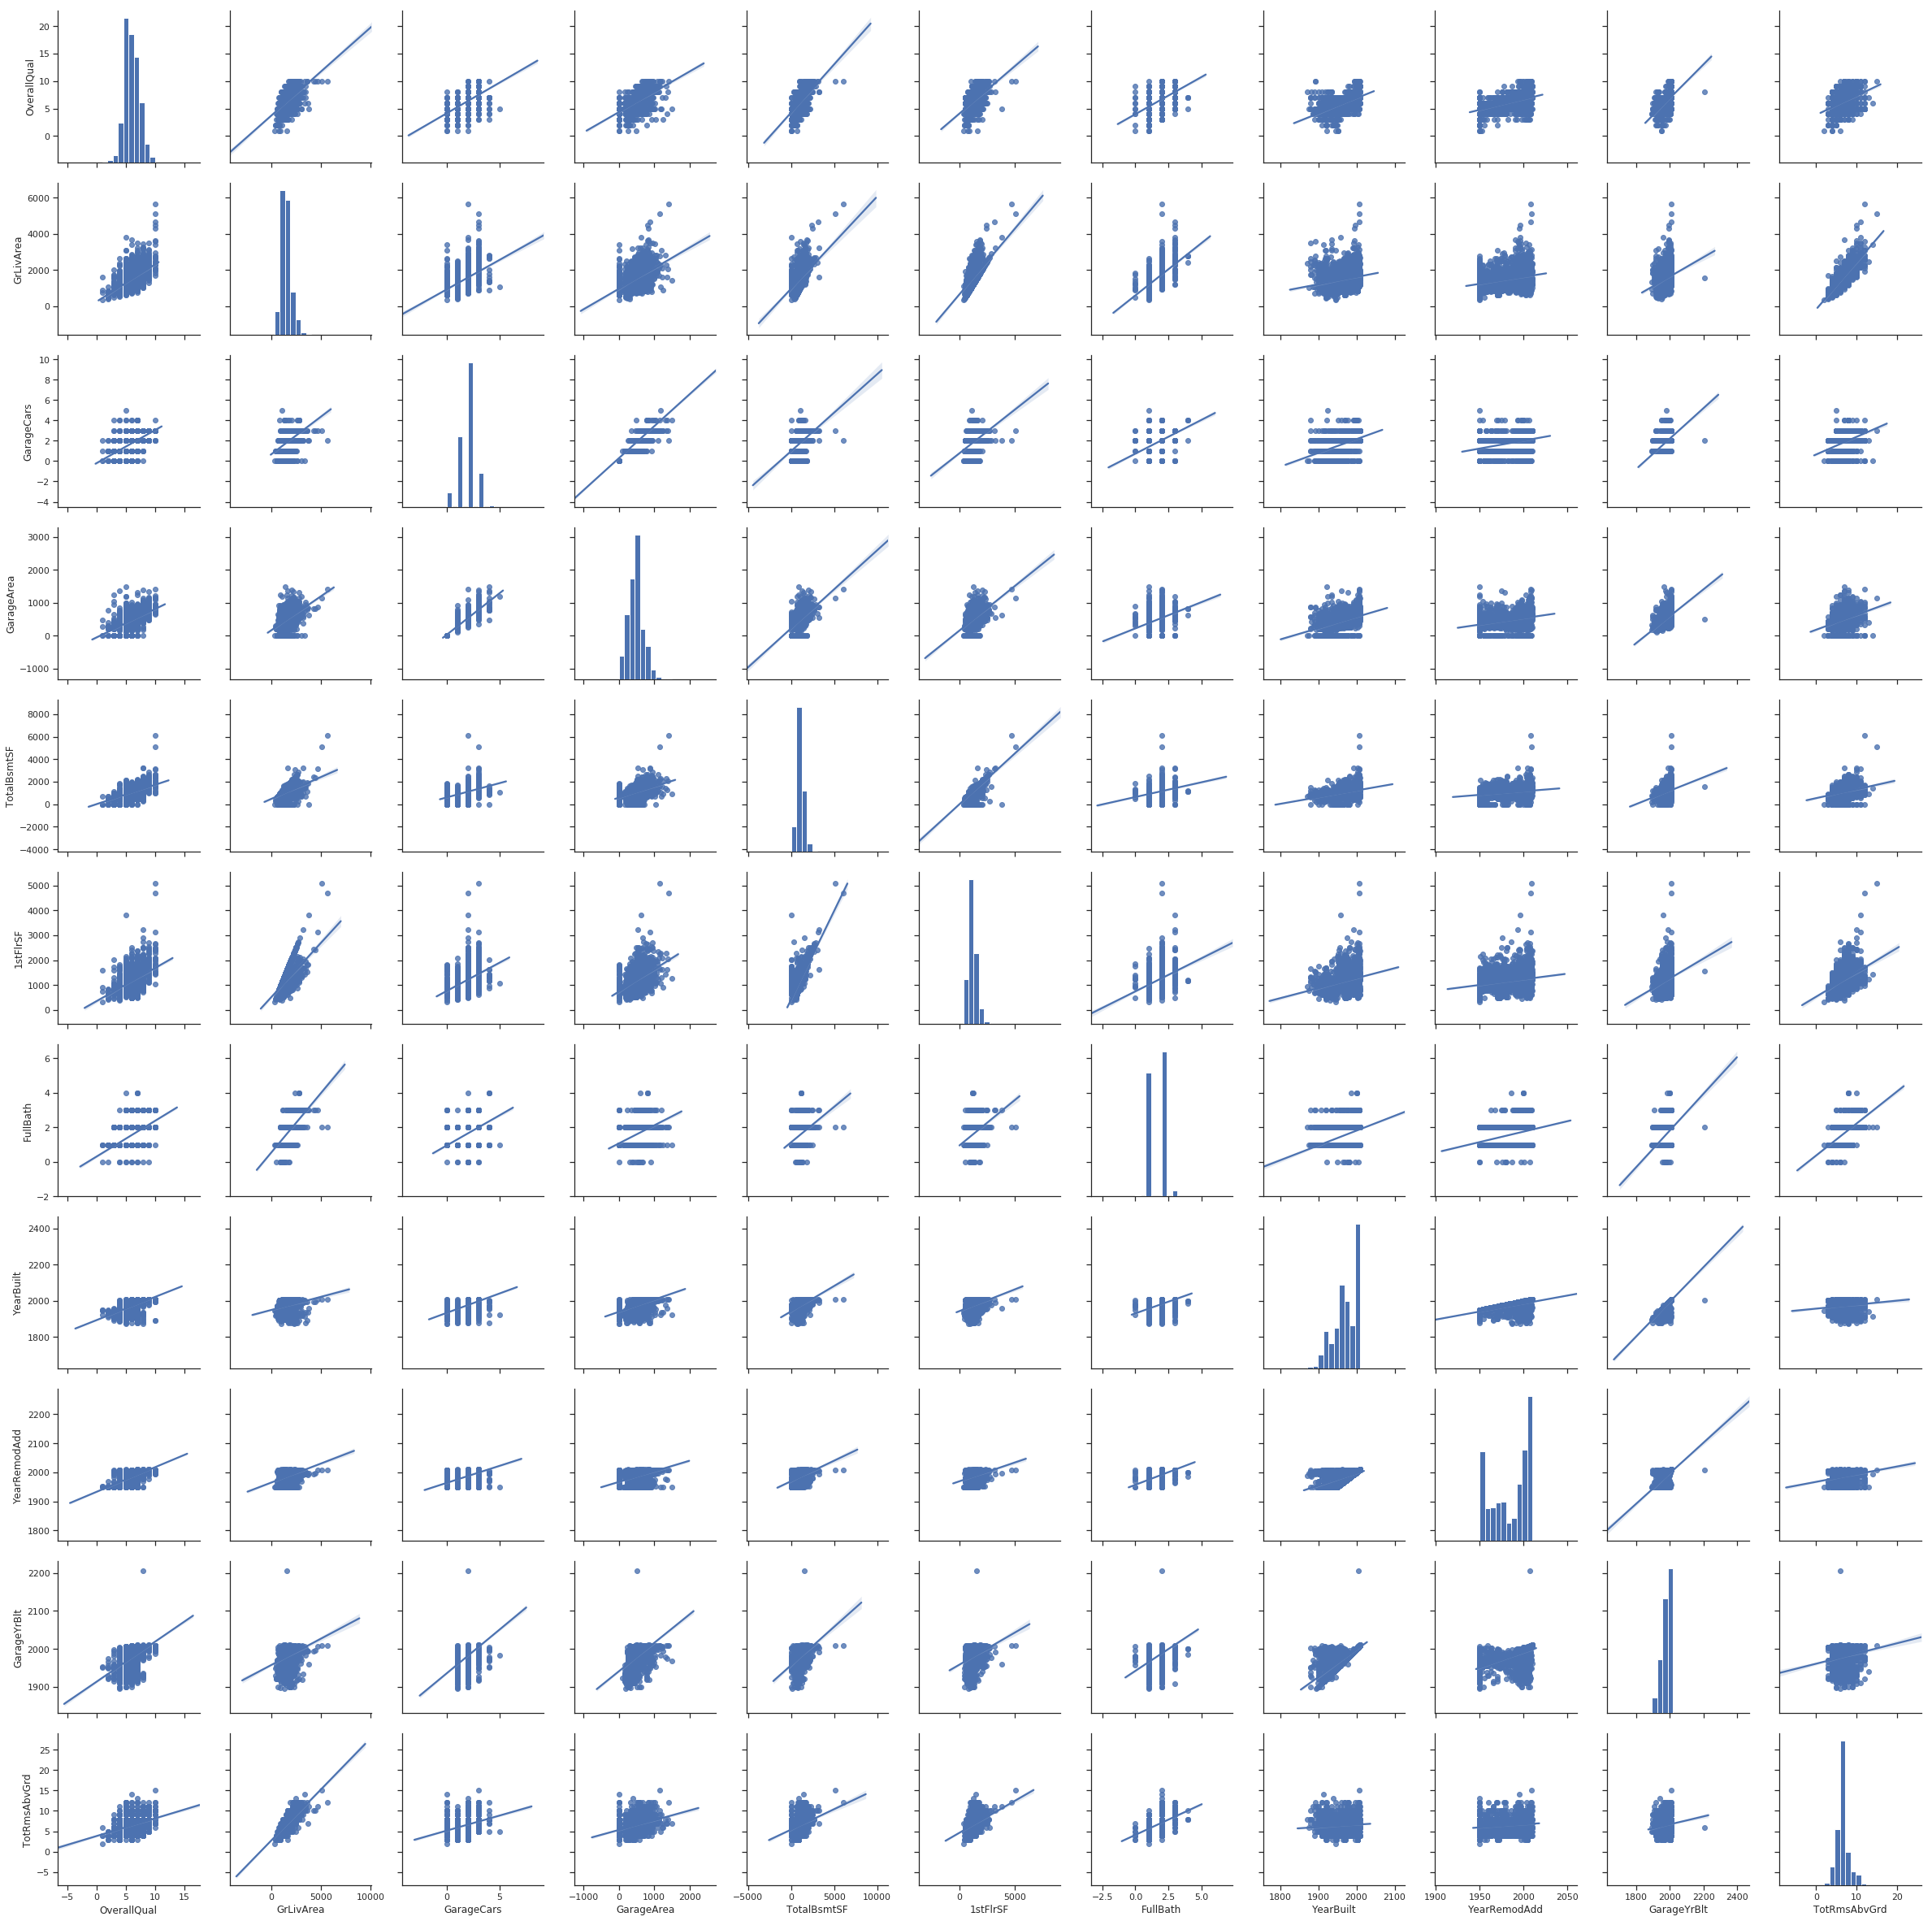

In [439]:
col = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt','YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd']
sns.set(style='ticks')
sns.pairplot(raw[col], size=3, kind='reg')

In [440]:
print("Find most important features relative to target")
corr = raw.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

**Imputting missing values**

In [0]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
raw['PoolQC'] = raw['PoolQC'].fillna('None')

In [0]:
#Arround 50% missing values attributes have been fill by None
raw['MiscFeature'] = raw['MiscFeature'].fillna('None')
raw['Alley'] = raw['Alley'].fillna('None')
raw['Fence'] = raw['Fence'].fillna('None')
raw['FireplaceQu'] = raw['FireplaceQu'].fillna('None')

In [0]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
raw['LotFrontage'] = raw.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    raw[col] = raw[col].fillna('None')

In [0]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    raw[col] = raw[col].fillna(int(0))

In [0]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    raw[col] = raw[col].fillna('None')

In [0]:
#MasVnrArea : replace with zero
raw['MasVnrArea'] = raw['MasVnrArea'].fillna(int(0))

In [0]:
#MasVnrType : replace with None
raw['MasVnrType'] = raw['MasVnrType'].fillna('None')

In [0]:
#There is put mode value 
raw['Electrical'] = raw['Electrical'].fillna(raw['Electrical']).mode()[0]

In [0]:

#There is no need of Utilities
raw= raw.drop(['Utilities'], axis=1)

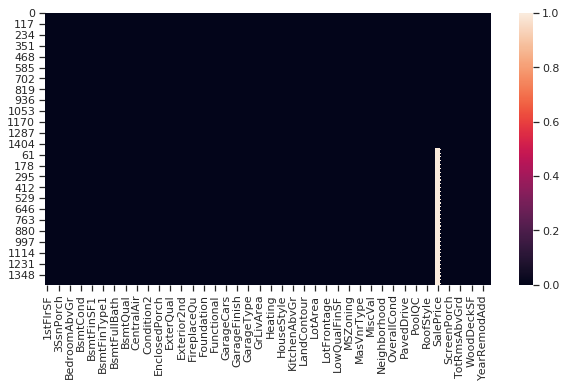

In [451]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(raw.isnull())

Now, there is no more missing values

(for  test  data  is  no sales's price . which has  to be  separated  and  predicted  later)

**Encoding string  to intiger**

In [0]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')



In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(raw[c].values)) 
    raw[c] = lbl.transform(list(raw[c].values))

In [0]:
# Now  dividing  preprocessed raw data  back into  train and  test  data
train=raw[0:1460]
test=raw[1460:2919]

Target variable analysis on target variable

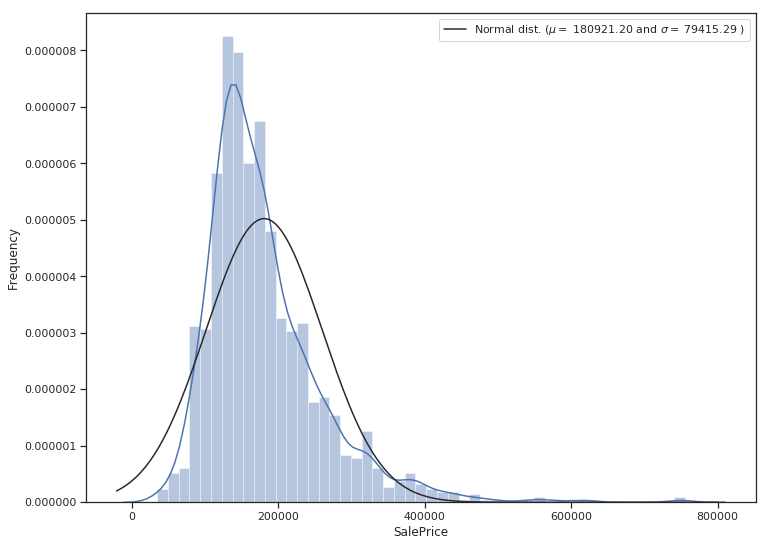

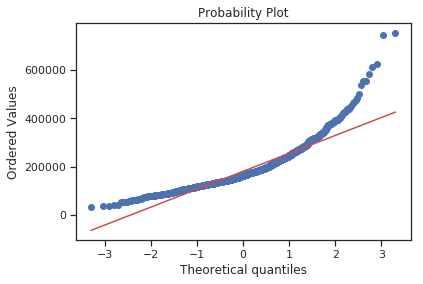

In [455]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

Using log for target variable to make more normal distribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


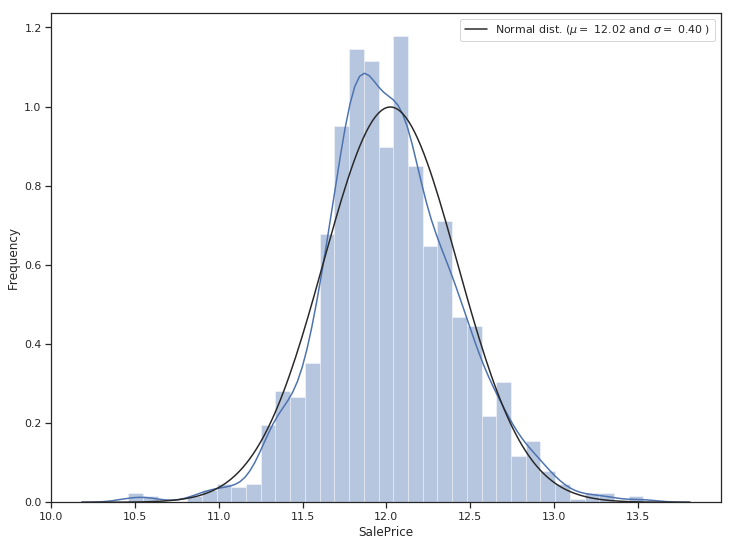

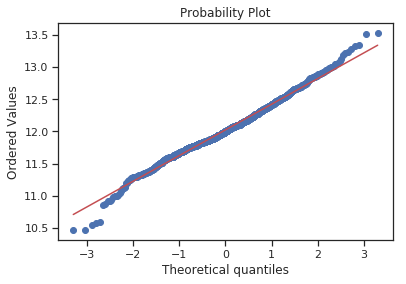

In [456]:

#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

**Data preparation  for prediction**

# SET#1

In [0]:
#X = train[['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','YrSold']]
#X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']] 
# Regression set 1
X =train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt','YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd']]

y = train['SalePrice']

In [0]:
#======= partition the data ===================================================================================================#
#   Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
#   If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
#==============================================================================================================================#
# also state how many percentage from train data set, we want to take as test data set
from sklearn.model_selection import train_test_split
# In this example, about 20% of the data is devoted to the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)


**Applying  models**

***Linear Regression***

In [0]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [0]:
# ---- fit the model / Model fitting
# lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)

In [461]:
#  coeffients  of  selected  independent variables

model.coef_

array([ 9.39571055e-02,  2.12427198e-04,  6.47515137e-02,  2.84348701e-05,
        6.59757013e-05,  6.60260293e-05, -2.34754808e-02,  1.90012719e-03,
        2.35768700e-03,  4.87134155e-05,  8.03744290e-03])

In [462]:
model.intercept_

2.3231883860117737

R^2 is: 
 0.8439176122936325
24 

RMSE is: 
 0.02912668867122167
25 



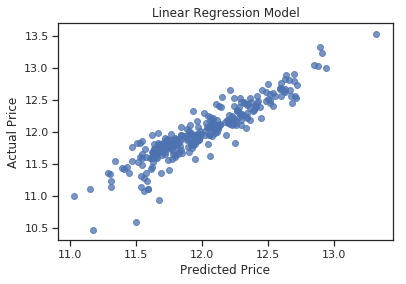

In [463]:
# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

print("24 \n")
# calculates the rmse
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, predictions))

print("25 \n")
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


In [464]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  84.39176122936325


***RandomForestRegression***

In [0]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [466]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [467]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  85.2371762445669


***GradientBoostingRegressor***

In [0]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
#GBR = GradientBoostingRegressor(n_estimators=90, max_depth=4)


# Train the classifier, With this accuracy of 84% was achieved.
# n=100, max_depth=4, min_samples_split=30, learning_rate=0.1, max_features =11,
# subsample 0.94, max_leaf_nodes=41.
GBR = GradientBoostingRegressor(n_estimators=100, max_depth = 4, min_samples_split = 30,
                                 learning_rate = 0.1, max_features=11, subsample = 0.94, 
                                 random_state=3, max_leaf_nodes=41)

In [469]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=11, max_leaf_nodes=41,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=30,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=3,
                          subsample=0.94, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [470]:

print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  86.15550635336974


# SET#2

*As there  is  direct  impact  on  SalesPrice  from Age  of  house  and even CentralAir  etc*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


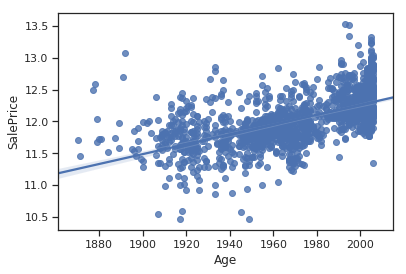

In [471]:

# view this relationship between property age and salesprice graphically with a scatter plot.


train['Age']=train['YearBuilt'] - train['YrSold']
sns.regplot(train['Age'], train['SalePrice'])

Age increases ,sales price decreses
(note: here higher  no . of  yr means  newer home)

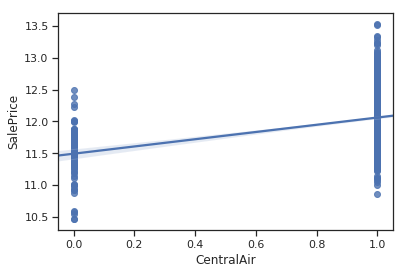

In [472]:
# view this relationship between property CentralAir and salesprice graphically 
sns.regplot(train['CentralAir'], train['SalePrice'])

Presensence of CentralAir increases SalesPrice

Model Building

In [0]:
#X1=train[[ 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'CentralAir',  '1stFlrSF', '2ndFlrSF',  'BedroomAbvGr',  'YrSold' ]]
X1=train[['OverallQual', 'OverallCond', 'YearBuilt', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr' ,'YrSold' ]]

y1=train['SalePrice']

#X1=X1.values
#y1=y1.values

In [0]:
from sklearn.model_selection import train_test_split
# In this example, about 20% of the data is devoted to the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42, test_size=.20)

***Linear Regression***

In [0]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [0]:
# ---- fit the model / Model fitting
# lr.fit() method will fit the linear regression on the features and target variable that we pass.
model1 = lr.fit(X_train, y_train)

R^2 is: 
 0.8591615751795607
24 

RMSE is: 
 0.026281997687064112
25 



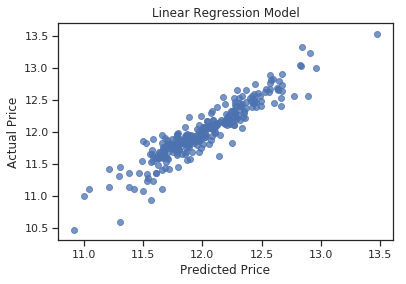

In [477]:
# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model1.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions1 = model1.predict(X_test)

print("24 \n")
# calculates the rmse
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, predictions1))

print("25 \n")
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values1 = y_test
plt.scatter(predictions1, actual_values1, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

***Random Forest***

In [0]:
#Random Forest
#Train the model
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=1000)

In [479]:
#Fit
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [480]:
#Score/Accuracy
print("Accuracy --> ", model1.score(X_test, y_test)*100)

Accuracy -->  86.70173780248483


***GradientBoostingRegressor***

In [0]:
#gradient booster

GBR1 = GradientBoostingRegressor(n_estimators=90, max_depth = 4, min_samples_split =10,
                                 learning_rate = 0.1, max_features=0.5, subsample = 0.7, 
                                 random_state=3, max_leaf_nodes=30)

In [482]:
#Fit
GBR1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=0.5, max_leaf_nodes=30,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=90,
                          n_iter_no_change=None, presort='auto', random_state=3,
                          subsample=0.7, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [483]:

print("Accuracy --> ", GBR1.score(X_test, y_test)*100)

Accuracy -->  87.50259240027847


In [0]:
#Treat the test data in the same way as training data. In this case, pull same columns.

test_X1 = test[['OverallQual', 'OverallCond', 'YearBuilt', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr' ,'YrSold' ]]
# Use the model to make predictions (GBR1)
predicted_prices = GBR1.predict(test_X1)*10000

In [485]:
print(predicted_prices)

[117378.94627643 119293.9579464  120252.39839378 ... 118623.58730541
 118440.26821403 123480.24401688]


In [0]:
my_submission = pd.DataFrame({'id': test_d.Id, 'SalePrice': predicted_prices})

my_submission.to_csv('sample_submission1.csv', index=False)

In [487]:
sub=pd.read_csv('sample_submission1.csv')
sub.head()

,id,SalePrice
0,1461,117378.946276
1,1462,119293.957946
2,1463,120252.398394
3,1464,120352.619999
4,1465,122731.498395


Submission file  path :https://colab.research.google.com/drive/1E6IOBCU_JW9Bu_s0E_Z_Jn-mKphCWOEe#scrollTo=GQVwEYuLS25Z

In [0]:
# downloading  the submission file directly  (without  google  drive )

from google.colab import files
files.download('sample_submission1.csv')


